## 1- problem Definition and understanding

# Superstore Dataset

With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid

You can even take this a step further and try and build a Regression model to predict Sales or Profit.

Dataset: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

# b- Outline
- <a href='#1'>1. Packages  </a> 
- <a href='#2'>2. Data</a>
    - <a href='#1.1'>2.1. loading data </a> <br>
    - <a href='#1.1'>2.2. Data overview</a> <br>
        head(), sample(), info(), describe(), nunique()
- <a href='#3'>3. Data Manipulation</a> <br>
    fix the wrong data type columns <br>
    dropna ( is a samll amount ) <br>
    change/correct the colmun name or cell content ( may create new columns )<br>
    
- <a href='#4'>4. Exploratory Data Analysis</a><br> 
    - <a href='#4.1'>4.1. univariate visualization </a><br>
            - <a href='#4.1.1'>4.1.1. univariate visualization numerical columns </a><br>
            - <a href='#4.1.2'>4.1.2. univariate visualization categorcal columns </a>
    - <a href='#4.2'>4.2. bivariate visualization </a>
    - <a href='#4.3'>4.3. multivariate visualization </a>
    - <a href='#4.4'>4.4. Correlation Matrix</a>
    
- <a href='#5'>5. Data preprocessing</a> <br>
    add new columns if needed<br>
    remove columns if needed<br>
    split featrures columns and target column <br>
    use one hot/label encoder for binary categorical coulmns ( yes/no, male/female ,....)<br>
    split numerical coulmns and categorical columns <br>
    split data x_trian, x_test , y_train, y_test<br>
    make a pipeline as known <br>
    

- <a href='#6'>6. Model Building</a> <br>
    Evaluation Metrics : ...........
- <a href='#6.1'>6.1. Baseline Model </a>
  


# <a id = '1'> 1 .packages </a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings ## used to ignore warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# <a id = '2'>2. Data</a>

# <a id = '1.1'>2.1 loading data</a>

In [3]:
os.getcwd()

'C:\\Users\\hmohammad\\Desktop\\udacity\\mygithub\\data_analysis'

In [4]:
path = os.path.join(os.getcwd() , 'Sample_Superstore.csv' )
path

'C:\\Users\\hmohammad\\Desktop\\udacity\\mygithub\\data_analysis\\Sample_Superstore.csv'

In [5]:
df = pd.read_csv(path, encoding='windows-1252')

# <a id = '1.2'>2.2 data review </a>

## 1 Asking questions

- What are the top selling products in the superstore?
- What is the sales trend over time (monthly, yearly)?
- Which category of products generates the highest revenue and profit?
- Which region generates the most sales?
- What is the impact of discounts and promotions on sales?
- What is the average profit margin for each product category?
- Which sub-category of products has the highest demand?

# 2- Data understanding

* Row ID => Unique ID for each row.
* Order ID => Unique Order ID for each Customer.
* Order Date => Order Date of the product.
* Ship Date => Shipping Date of the Product.
* Ship Mode=> Shipping Mode specified by the Customer.
* Customer ID => Unique ID to identify each Customer.
* Customer Name => Name of the Customer.
* Segment => The segment where the Customer belongs.
* Country => Country of residence of the Customer.
* City => City of residence of of the Customer.
* State => State of residence of the Customer.
* Postal Code => Postal Code of every Customer.
* Region => Region where the Customer belong.
* Product ID => Unique ID of the Product.
* Category => Category of the product ordered.
* Sub-Category => Sub-Category of the product ordered.
* Product Name => Name of the Product
* Sales => Sales of the Product.
* Quantity => Quantity of the Product.
* Discount => Discount provided.
* Profit => Profit/Loss incurred.

# 3 Data wrangling

In [6]:
# Set the maximum number of columns to display
pd.options.display.max_columns = None
# Set the maximum number of rows to display
pd.options.display.max_rows = None


In [7]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4469,4470,CA-2017-168641,11/24/2017,12/01/2017,Standard Class,KA-16525,Kelly Andreada,Consumer,United States,New York City,New York,10035,East,OFF-PA-10001972,Office Supplies,Paper,Xerox 214,12.960,2,0.0,6.2208
6261,6262,CA-2017-103506,7/23/2017,7/27/2017,Standard Class,LR-17035,Lisa Ryan,Corporate,United States,Long Beach,New York,11561,East,OFF-LA-10001158,Office Supplies,Labels,"Avery Address/Shipping Labels for Typewriters,...",41.400,4,0.0,19.8720
3190,3191,US-2015-163783,12/27/2015,01/01/2016,Standard Class,DR-12940,Daniel Raglin,Home Office,United States,Chicago,Illinois,60610,Central,OFF-ST-10002957,Office Supplies,Storage,Sterilite Show Offs Storage Containers,12.672,3,0.2,-3.1680
3468,3469,CA-2016-146143,12/14/2016,12/19/2016,Standard Class,MC-17845,Michael Chen,Consumer,United States,Jackson,Mississippi,39212,South,FUR-FU-10002045,Furniture,Furnishings,"Executive Impressions 14""",133.380,6,0.0,58.6872
922,923,CA-2015-111164,04/11/2015,4/15/2015,Standard Class,SE-20110,Sanjit Engle,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004531,Technology,Phones,OtterBox Commuter Series Case - iPhone 5 & 5s,21.990,1,0.0,10.5552


### checking data type and missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9996 non-null   int64  
 1   Order ID       9996 non-null   object 
 2   Order Date     9996 non-null   object 
 3   Ship Date      9996 non-null   object 
 4   Ship Mode      9996 non-null   object 
 5   Customer ID    9996 non-null   object 
 6   Customer Name  9996 non-null   object 
 7   Segment        9996 non-null   object 
 8   Country        9996 non-null   object 
 9   City           9996 non-null   object 
 10  State          9996 non-null   object 
 11  Postal Code    9996 non-null   int64  
 12  Region         9996 non-null   object 
 13  Product ID     9996 non-null   object 
 14  Category       9996 non-null   object 
 15  Sub-Category   9996 non-null   object 
 16  Product Name   9996 non-null   object 
 17  Sales          9996 non-null   float64
 18  Quantity

In [10]:
#  ship date and order date shown as object data type, so can not make a math operations 
            # so it is better to change to datetime data type 

In [11]:
# to change the data type of ship date and order date columns 
df['Order Date'] = pd.to_datetime( df['Order Date'])
df['Ship Date'] = pd.to_datetime( df['Ship Date'])

In [12]:
# check AGAIN data type and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9996 non-null   int64         
 1   Order ID       9996 non-null   object        
 2   Order Date     9996 non-null   datetime64[ns]
 3   Ship Date      9996 non-null   datetime64[ns]
 4   Ship Mode      9996 non-null   object        
 5   Customer ID    9996 non-null   object        
 6   Customer Name  9996 non-null   object        
 7   Segment        9996 non-null   object        
 8   Country        9996 non-null   object        
 9   City           9996 non-null   object        
 10  State          9996 non-null   object        
 11  Postal Code    9996 non-null   int64         
 12  Region         9996 non-null   object        
 13  Product ID     9996 non-null   object        
 14  Category       9996 non-null   object        
 15  Sub-Category   9996 n

In [13]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [14]:
# what about duplication 
# if found should be deleted
df.duplicated().sum()

2

In [15]:
df[df.duplicated().values == True].index

Index([9994, 9995], dtype='int64')

In [16]:
# delete the duplicated row
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

### some statistical information
Understanding the distribution of the data: The mean, min, max, and other metrics provide a quick overview of the distribution of the data.

Outlier detection: The min, 25%, 75%, and max values can help identify outliers in the data.

Data normalization: The mean and std values can be used to normalize the data.

Feature scaling: The min, max, and other values can be used to scale the features to a suitable range.

In [18]:
# for non object columns 
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


#### It is important to compare all the numbers together ( mean, median, standard deviation, maximum, minimum , ) in order to understand the data well. One number cannot tell the whole story,
#### in case of NO outliers the 25% should be close to the min and the 75% should be close to the max
##### if the 25% is far from the min or the 75% if far from the max , that is mean there is outliers

In [19]:
# for the profit column
                    # there is a negative number in the profit column that is mean, the company sometime loss
                    # the max number is much bigger than 75% , that mean there is outliers 
# for the sales column
                    # the max number is much bigger than 75% , that mean there is outliers 
# from the order date, notice the the collected data for about 4 years 
# from the ship date, notice the the delivery time about 4 - 5 dayes                     

*shown the number of unique values*

In [20]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [21]:
# notes
# the active working days is 1237 (4 years = 1464days,off days-> 4*12*4*2 = 384days,non active days--> 1464 - 1237 = 227 days )
# the totola customer that dealt with the company is 793 
            # that is mean some of these customer dealt more than once 
    

In [22]:
df['Customer Name'].value_counts()

Customer Name
William Brown             37
John Lee                  34
Matt Abelman              34
Paul Prost                34
Chloris Kastensmidt       32
Seth Vernon               32
Jonathan Doherty          32
Edward Hooks              32
Zuschuss Carroll          31
Emily Phan                31
Arthur Prichep            31
Lena Cacioppo             30
Sally Hughsby             29
Dean percer               29
Brian Moss                29
Greg Tran                 29
Ken Lonsdale              29
Keith Dawkins             28
Clay Ludtke               28
Kunst Miller              28
Chris Selesnick           28
Xylona Preis              28
Ben Ferrer                27
Damala Kotsonis           27
Patrick Gardner           26
Cassandra Brandow         26
Laura Armstrong           26
Noel Staavos              26
Steven Cartwright         26
Stewart Visinsky          25
Pete Kriz                 25
Clytie Kelty              25
Erin Ashbrook             25
Adam Shillingsburg        25


In [29]:
# to figure out the name of the ship mode classes 
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [30]:
# how many time evevy ship mode is used 
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

# top 5

#### top 5 customers ( number of sales )(frequency)

In [23]:
# top 5 customers ( number of sales )[:5]
df['Customer Name'].value_counts()[:5]

Customer Name
William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
Name: count, dtype: int64

In [24]:
# where the 1st top 5 customer buy 
df[df['Customer Name'] == 'William Brown'].groupby("Region").size()

Region
Central     5
East        8
West       24
dtype: int64

In [25]:
# total sales for the 1st of the top 5 customer 
df[df['Customer Name'] == 'William Brown'].Sales.sum()

6160.102000000001

#### top 5 customers ( monetray)

In [26]:
# top 5 customers ( amount)
df.groupby("Customer Name").Sales.sum().sort_values(ascending=False)[:5]

Customer Name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64

In [27]:
# to know how is the frequncy of the customer ' sean miller'
df[df['Customer Name'] == 'Sean Miller']['Customer Name'].value_counts()

Customer Name
Sean Miller    15
Name: count, dtype: int64

In [28]:
# to know how is the frequncy of the customer ' Adrian Barton'
df[df['Customer Name'] == 'Adrian Barton']['Customer Name'].value_counts()

Customer Name
Adrian Barton    20
Name: count, dtype: int64

In [31]:
# to know the frequncy of all categories 
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

#### the best caterory sales ( monetray )

In [32]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

Category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: Sales, dtype: float64

<Axes: xlabel='Category'>

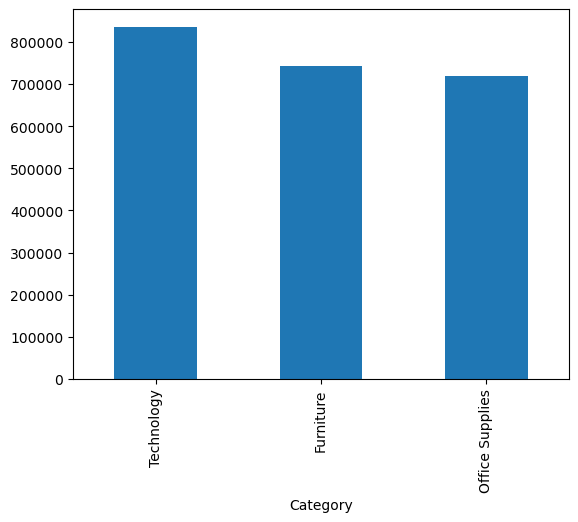

In [33]:
df.groupby('Category')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')

#### the best caterory profit

In [34]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=False)

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

<Axes: xlabel='Category'>

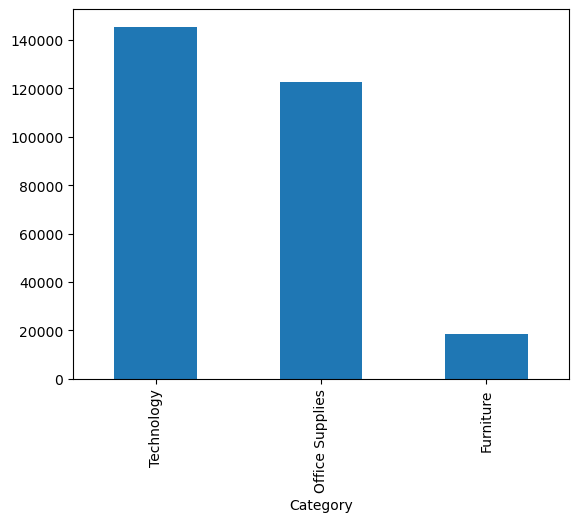

In [35]:
df.groupby('Category')['Profit'].sum().sort_values(ascending=False).plot(kind='bar')

In [36]:
# to figure out how many discount operation has done for each category
df.groupby('Category').Discount.size().sort_values(ascending=False)

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: Discount, dtype: int64

####   top 5 selling products in the superstore?

In [40]:
# top_selling_products
df.groupby('Product Name').Sales.sum().sort_values(ascending=False).head(5)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64

### top 5  profitable products ?

In [41]:
df.groupby('Product Name').Profit.sum().sort_values(ascending=False).head(5)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64

### Are the top-selling products the most profitable?

<Axes: xlabel='Product Name'>

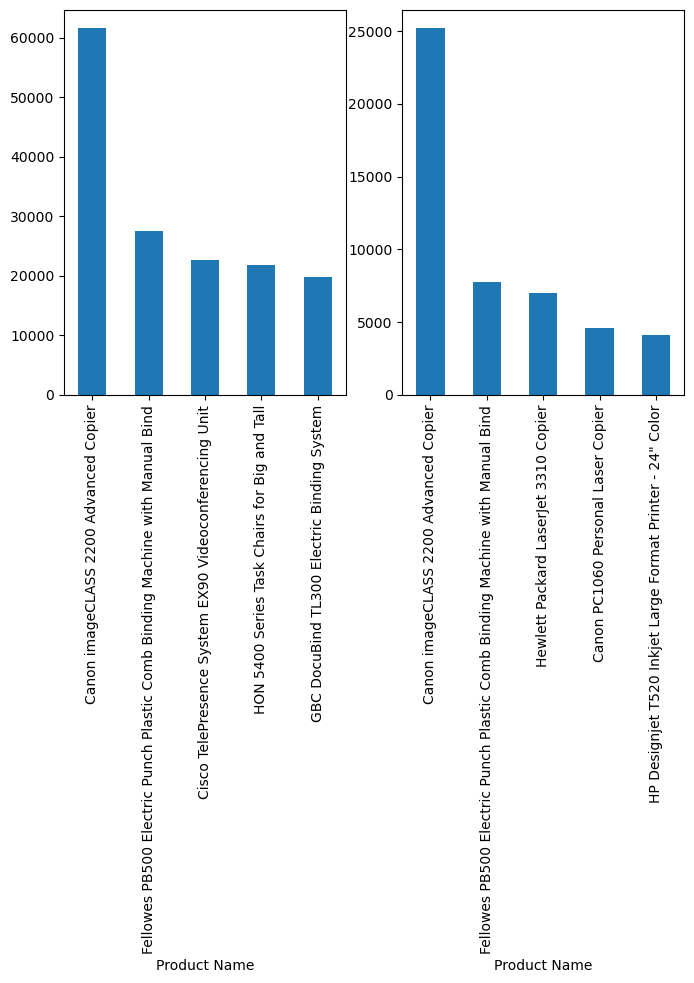

In [42]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
df.groupby('Product Name').Sales.sum().sort_values(ascending=False).head(5).plot(kind= 'bar')
plt.subplot(1,2,2)
df.groupby('Product Name').Profit.sum().sort_values(ascending=False).head(5).plot(kind='bar')

# regions study 

In [56]:
df.Region.value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

In [37]:
# how many time each category has sold in each region 
df.groupby(['Region','Category']).size()

Region   Category       
Central  Furniture           481
         Office Supplies    1422
         Technology          420
East     Furniture           601
         Office Supplies    1712
         Technology          535
South    Furniture           332
         Office Supplies     995
         Technology          293
West     Furniture           707
         Office Supplies    1897
         Technology          599
dtype: int64

#### sales ( monetray) generated by Regions

In [38]:
Region_sales = df.groupby('Region').Sales.sum().sort_values(ascending=False)
Region_sales

Region
West       725457.8245
East       678781.2400
Central    501239.8908
South      391721.9050
Name: Sales, dtype: float64

In [77]:
# how many the best sold product sold in each region (frequncy)
nu_sales = df[df['Product Name']=='Canon imageCLASS 2200 Advanced Copier'].groupby('Region').size()
nu_sales

Region
Central    1
East       3
West       1
dtype: int64

In [58]:
# how mutch sales for the best sold product in each region (monetry)
df[df['Product Name']=='Canon imageCLASS 2200 Advanced Copier'].groupby('Region').Sales.sum()

Region
Central    17499.950
East       30099.914
West       13999.960
Name: Sales, dtype: float64

In [78]:
# how mutch profit for the best sold product in each region 
df[df['Product Name']=='Canon imageCLASS 2200 Advanced Copier'].groupby('Region').Profit.sum()

Region
Central     8399.9760
East       10079.9712
West        6719.9808
Name: Profit, dtype: float64

In [60]:
pp = df[df['Product Name']=='Canon imageCLASS 2200 Advanced Copier']
summ = pp.groupby(['Region'])[['Sales', 'Profit', 'Discount']].sum()
summ

,Sales,Profit,Discount
Region,,,
Central,17499.950,8399.9760,0.0
East,30099.914,10079.9712,0.6
West,13999.960,6719.9808,0.0


# something is not reasenable 
## -  central region sold 1 piece with price 17,499 where the west region sold one pice with 13,999 ( no discount )
## - the east region sold 3 pieces with 30099( about 10,000 / one piece) with high discount 60%

In [61]:
summ['nu_sales'] = nu_sales
summ

,Sales,Profit,Discount,nu_sales
Region,,,,
Central,17499.950,8399.9760,0.0,1
East,30099.914,10079.9712,0.6,3
West,13999.960,6719.9808,0.0,1


<Axes: xlabel='Region'>

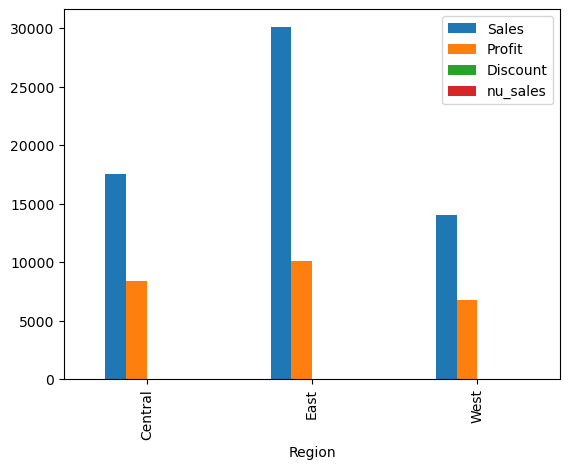

In [62]:
summ.plot(kind='bar')
# plt.grid(axis='y')

In [63]:
Fellowes_regin_size =df[df['Product Name']=='Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind'].groupby('Region').size()
Fellowes_regin_size

Region
Central    3
East       2
South      2
West       3
dtype: int64

In [79]:
Fellowes_regin_s_p = df[df['Product Name']=='Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind']
Fellowes_regin_s_p = Fellowes_regin_s_p.groupby(['Region'])[['Sales', 'Profit', 'Discount']].sum()
Fellowes_regin_s_p

,Sales,Profit,Discount
Region,,,
Central,6100.752,-1525.188,1.6
East,5592.356,2414.881,0.2
South,7625.940,3812.970,0.0
West,8134.336,3050.376,0.6


In [80]:
Fellowes_regin_s_p['Fellowes_regin_size'] = Fellowes_regin_size
Fellowes_regin_s_p

,Sales,Profit,Discount,Fellowes_regin_size
Region,,,,
Central,6100.752,-1525.188,1.6,3
East,5592.356,2414.881,0.2,2
South,7625.940,3812.970,0.0,2
West,8134.336,3050.376,0.6,3


<Axes: xlabel='Region'>

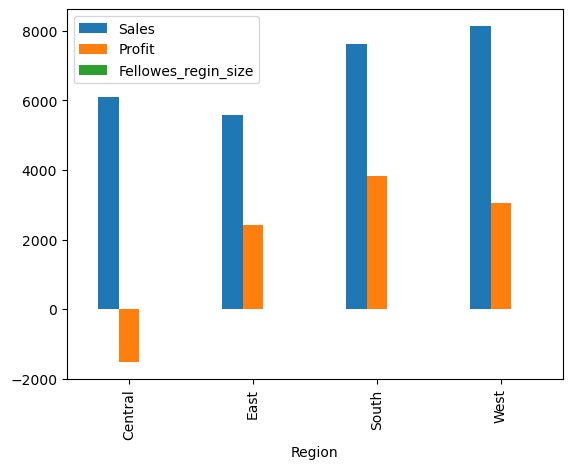

In [66]:
Fellowes_regin_s_p.plot(kind='bar')

#### top 5 state ( as sales ) ( monetray)

In [39]:
state_sales = df.groupby('State').Sales.sum().sort_values(ascending=False)
state_sales.head(5)

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Name: Sales, dtype: float64

# trend study 

#### daily sales 

In [69]:
date_sales = df.groupby(['Order Date'], as_index=False).Sales.sum()
date_sales

,Order Date,Sales
0,2014-01-03,16.4480
1,2014-01-04,288.0600
2,2014-01-05,19.5360
3,2014-01-06,4407.1000
4,2014-01-07,87.1580
5,2014-01-09,40.5440
6,2014-01-10,54.8300
7,2014-01-11,9.9400
8,2014-01-13,3553.7950
9,2014-01-14,61.9600


#### monthly sales 

In [76]:
monthly_sales = df.set_index('Order Date').resample('M').Sales.sum()
monthly_sales

Order Date
2014-01-31     14236.8950
2014-02-28      4519.8920
2014-03-31     55691.0090
2014-04-30     28295.3450
2014-05-31     23648.2870
2014-06-30     34595.1276
2014-07-31     33946.3930
2014-08-31     27909.4685
2014-09-30     81777.3508
2014-10-31     31453.3930
2014-11-30     78628.7167
2014-12-31     69545.6205
2015-01-31     18174.0756
2015-02-28     11951.4110
2015-03-31     38726.2520
2015-04-30     34195.2085
2015-05-31     30131.6865
2015-06-30     24797.2920
2015-07-31     28765.3250
2015-08-31     36898.3322
2015-09-30     64595.9180
2015-10-31     31404.9235
2015-11-30     75972.5635
2015-12-31     74919.5212
2016-01-31     18542.4910
2016-02-29     22978.8150
2016-03-31     51715.8750
2016-04-30     38750.0390
2016-05-31     56987.7280
2016-06-30     40344.5340
2016-07-31     39261.9630
2016-08-31     31115.3743
2016-09-30     73410.0249
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.3740
2017-02-28     20301.1334
2

## yearly sales 

In [43]:
yearly_sales = df.set_index('Order Date').resample('Y').Sales.sum().round(2)
yearly_sales

Order Date
2014-12-31    484247.50
2015-12-31    470532.51
2016-12-31    609205.60
2017-12-31    733215.26
Freq: A-DEC, Name: Sales, dtype: float64

## what is the best year ( profit )

In [44]:
yearly_profit = df.set_index('Order Date').resample('Y').Profit.sum().round(2)
yearly_profit

Order Date
2014-12-31    49543.97
2015-12-31    61618.60
2016-12-31    81795.17
2017-12-31    93439.27
Freq: A-DEC, Name: Profit, dtype: float64

# final concolusion 
**top_5_customer_as_monetry:**
- Sean Miller      25043.050
- Tamara Chand     19052.218
- Raymond Buch     15117.339
- Tom Ashbrook     14595.620
- Adrian Barton    14473.571

**top_5_customers_as_frequency:**
- William Brown          37
- John Lee               34
- Matt Abelman           34
- Paul Prost             34
- Chloris Kastensmidt    32

**the best caterory sales**
- Technology         836154.0330
- Furniture          741999.7953
- Office Supplies    719319.7920

**the best caterory profit**
- Technology         145454.9481
- Office Supplies    122577.0688
- Furniture           18451.2728- 

**top_5_selling_products:**
- Canon imageCLASS 2200 Advanced Copier
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
- Cisco TelePresence System EX90 Videoconferencing Unit
- HON 5400 Series Task Chairs for Big and Tall
- GBC DocuBind TL300 Electric Binding System

**top_5_profit_products:**
- Canon imageCLASS 2200 Advanced Copier
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
- Hewlett Packard LaserJet 3310 Copier
- Canon PC1060 Personal Laser Copier
- HP Designjet T520 Inkjet Large Format Printer - 24" Color

**The highest selling products, and the most profitable**
- Canon imageCLASS 2200 Advanced Copier
- Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind


## top placies are :
**Cities**: [New York City, Los Angeles, Seattle, San Francisco, Detroit]

**State** : [california, New York]

**Region** : [West]


# <a id = '4'>4. Exploratory Data Analysis EDA </a>

# <a id = '4.1'>4.1 univariate visualization </a>

### <a id = '4.1.1'>4.1.1 univariate visualization numerical columns </a>

<Axes: ylabel='Sales'>

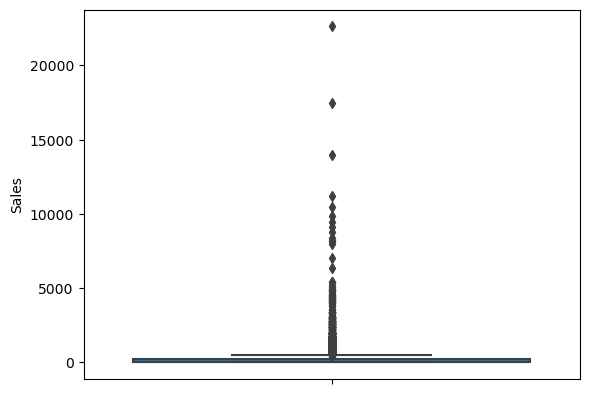

In [45]:
# plt.boxplot(df['Sales'])
# sns.catplot(y = 'Sales', data = df, kind= 'box')
sns.boxplot(y = 'Sales', data = df, whis=1.5)

### comment : the are a lot of many outliers

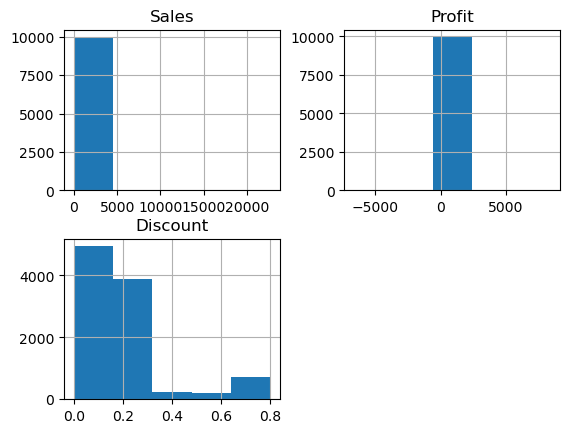

In [46]:
df[['Sales','Profit','Discount']].hist(bins=5);

## Sales Generated by State

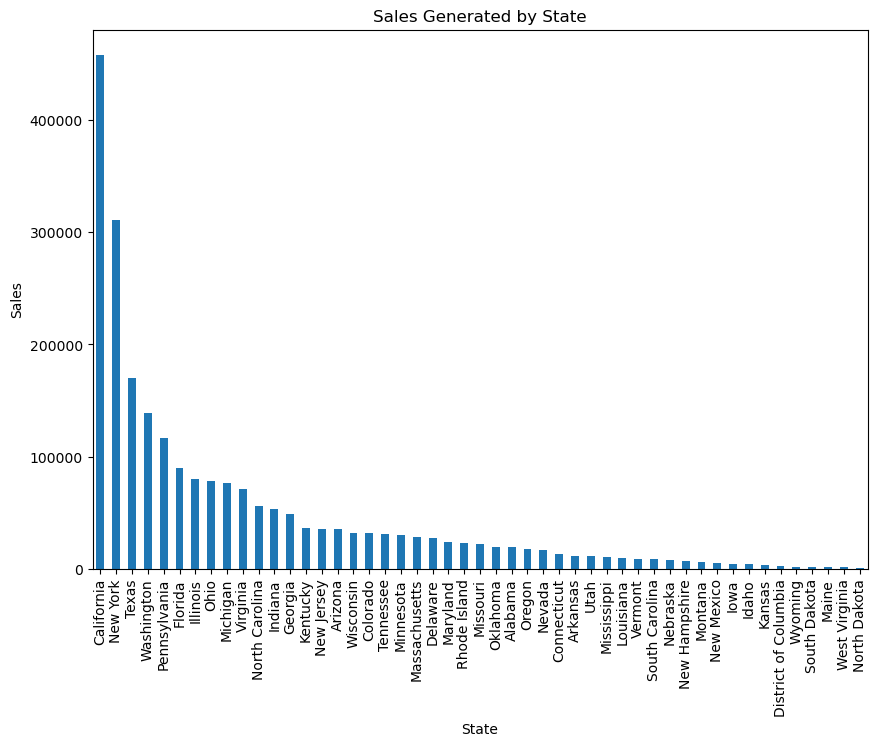

In [47]:
plt.figure(figsize=(10,7))
state_sales.plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)
plt.show()

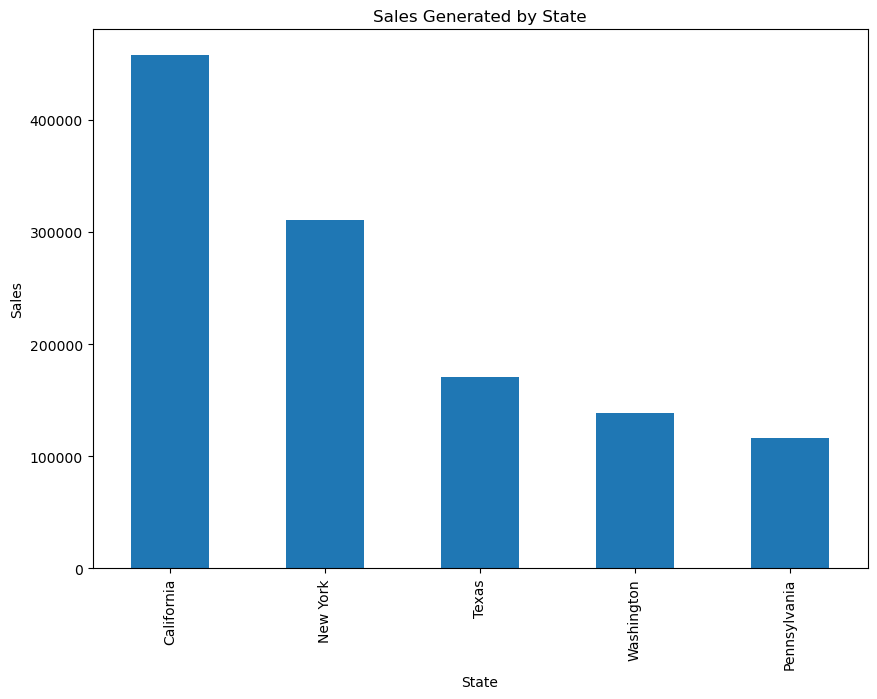

In [81]:
plt.figure(figsize=(10,7))
state_sales.head(5).plot(kind='bar')
plt.xlabel("State")
plt.ylabel("Sales")
plt.title("Sales Generated by State")
plt.xticks(rotation=90)
plt.show()

### Sales Generated by Regions

<Axes: xlabel='Region'>

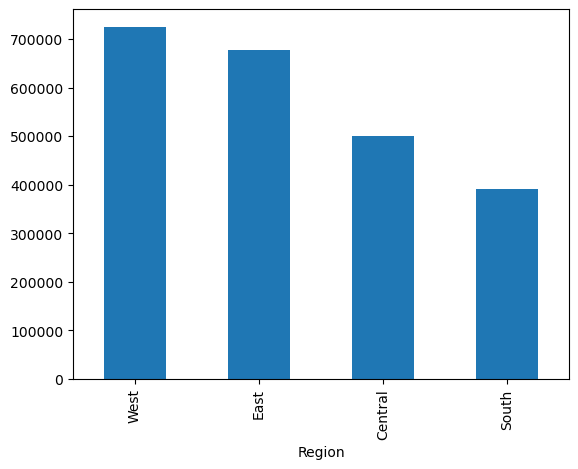

In [48]:
Region_sales.head(5).plot(kind='bar')

### <a id = '4.1.2'>4.1.2 univariate visualization categorcal columns </a>

### the best region as a frequency sales

<Axes: xlabel='Region', ylabel='count'>

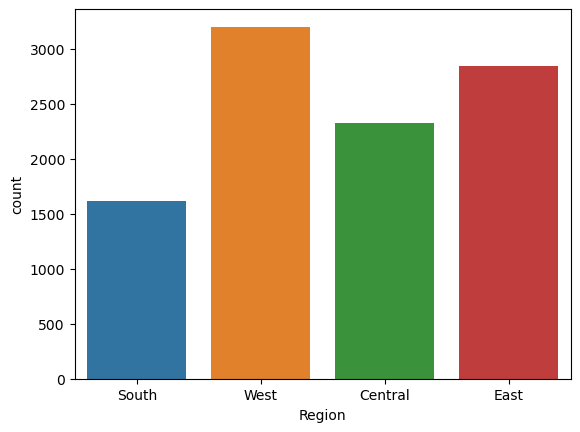

In [49]:
sns.countplot(x= 'Region', data = df)

<Axes: xlabel='Region'>

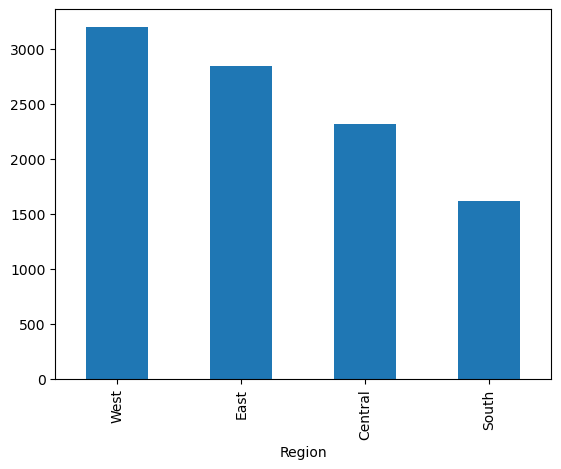

In [50]:
# study Region column using pandas 
df['Region'].value_counts().plot(kind='bar')

### comment:<br> western region is the best sales 

# <a id = '4.2'>4.2  bivariate visualization </a>

<Axes: xlabel='Region', ylabel='count'>

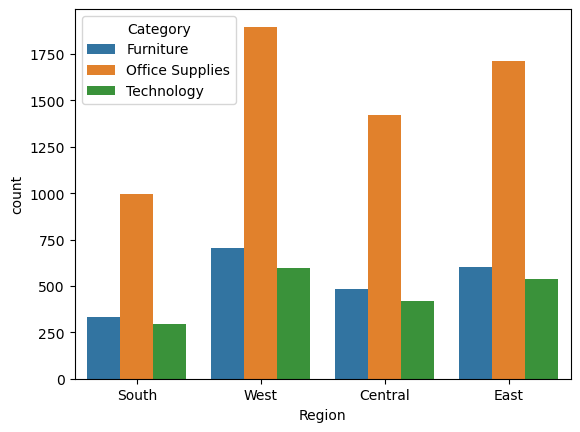

In [51]:
sns.countplot(x= 'Region', data = df , hue= 'Category')

<Axes: xlabel='Region', ylabel='Sales'>

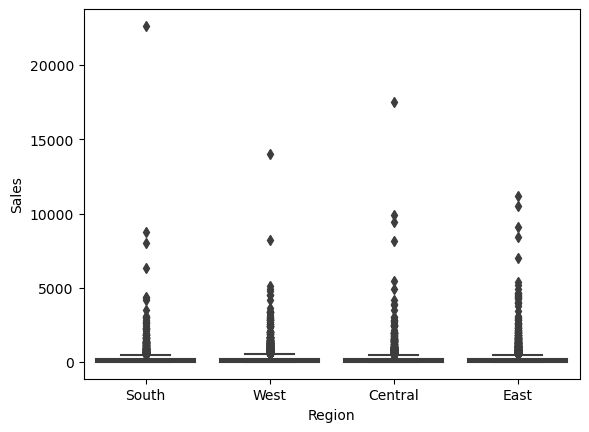

In [52]:
sns.boxplot(y= 'Sales', x = 'Region', data = df)

# <a id = '4.3'>4.3 multivariate visualization </a>

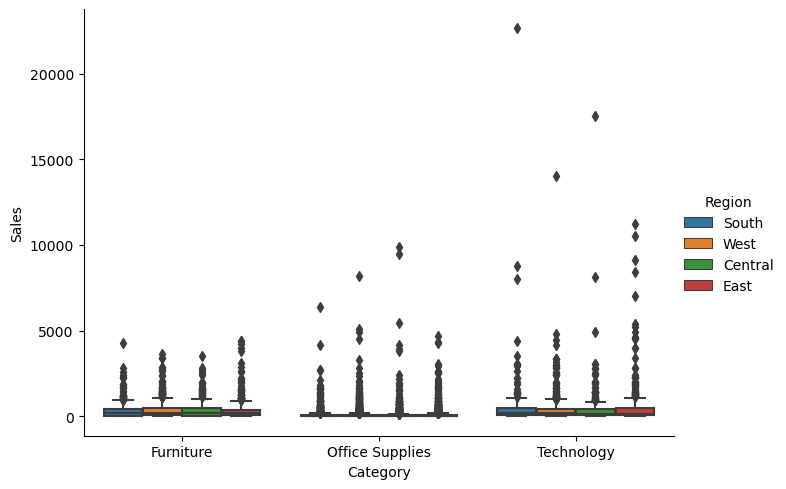

In [53]:
sns.catplot(y= 'Sales', x = 'Category', data = df ,hue= 'Region',
            kind= 'box', height=5, aspect=1.4)

### sales trend yearly

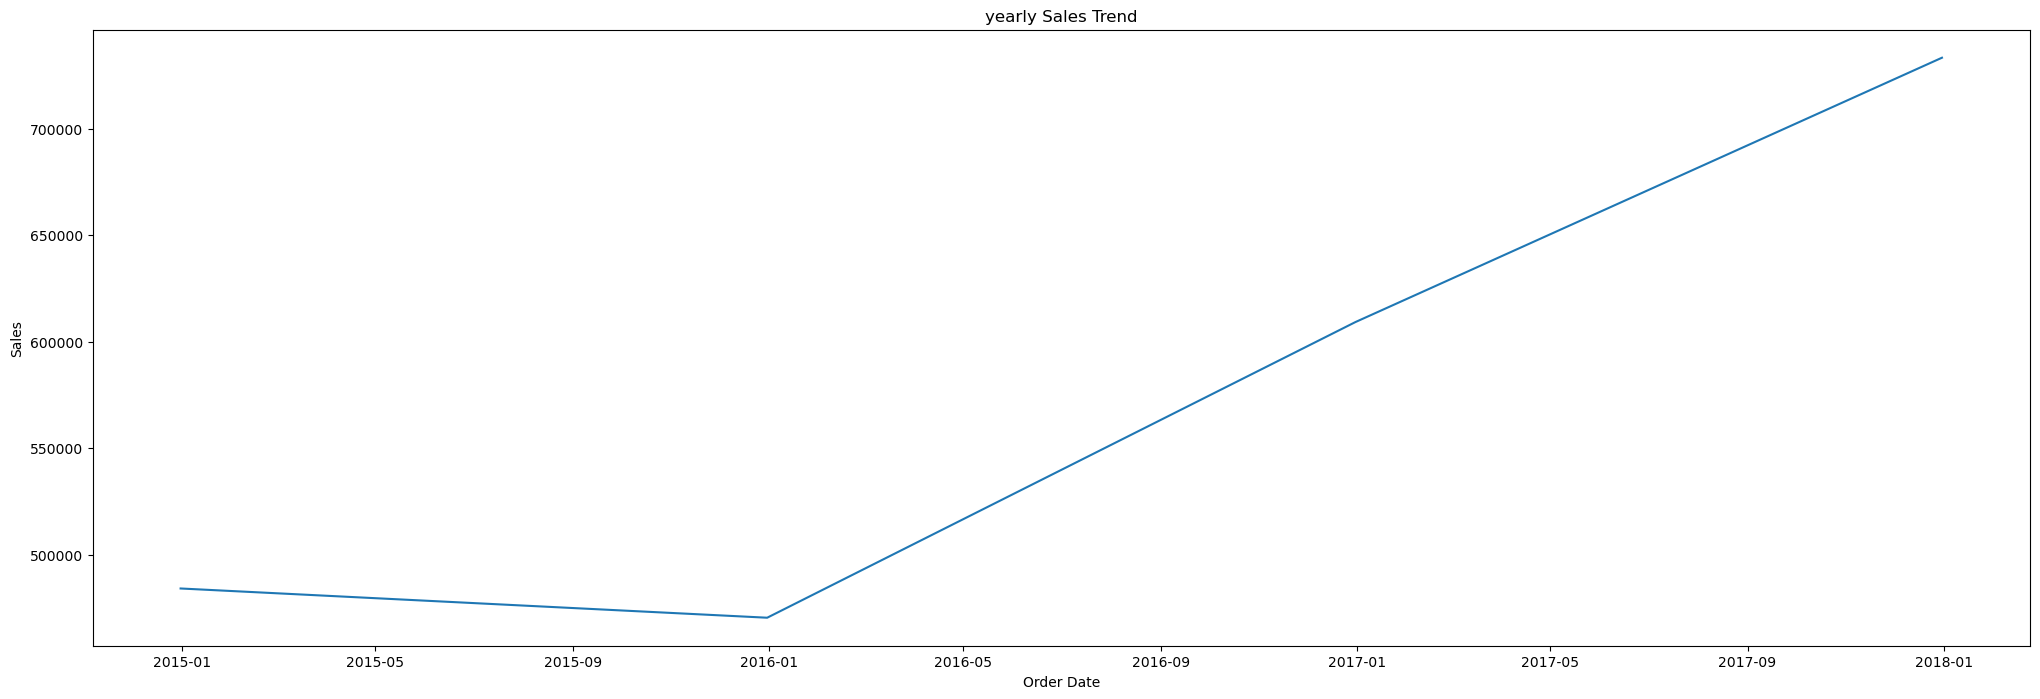

In [54]:
plt.figure(figsize=(25,8))
plt.plot(yearly_sales)
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("yearly Sales Trend")
plt.show()

### sales trend monthly

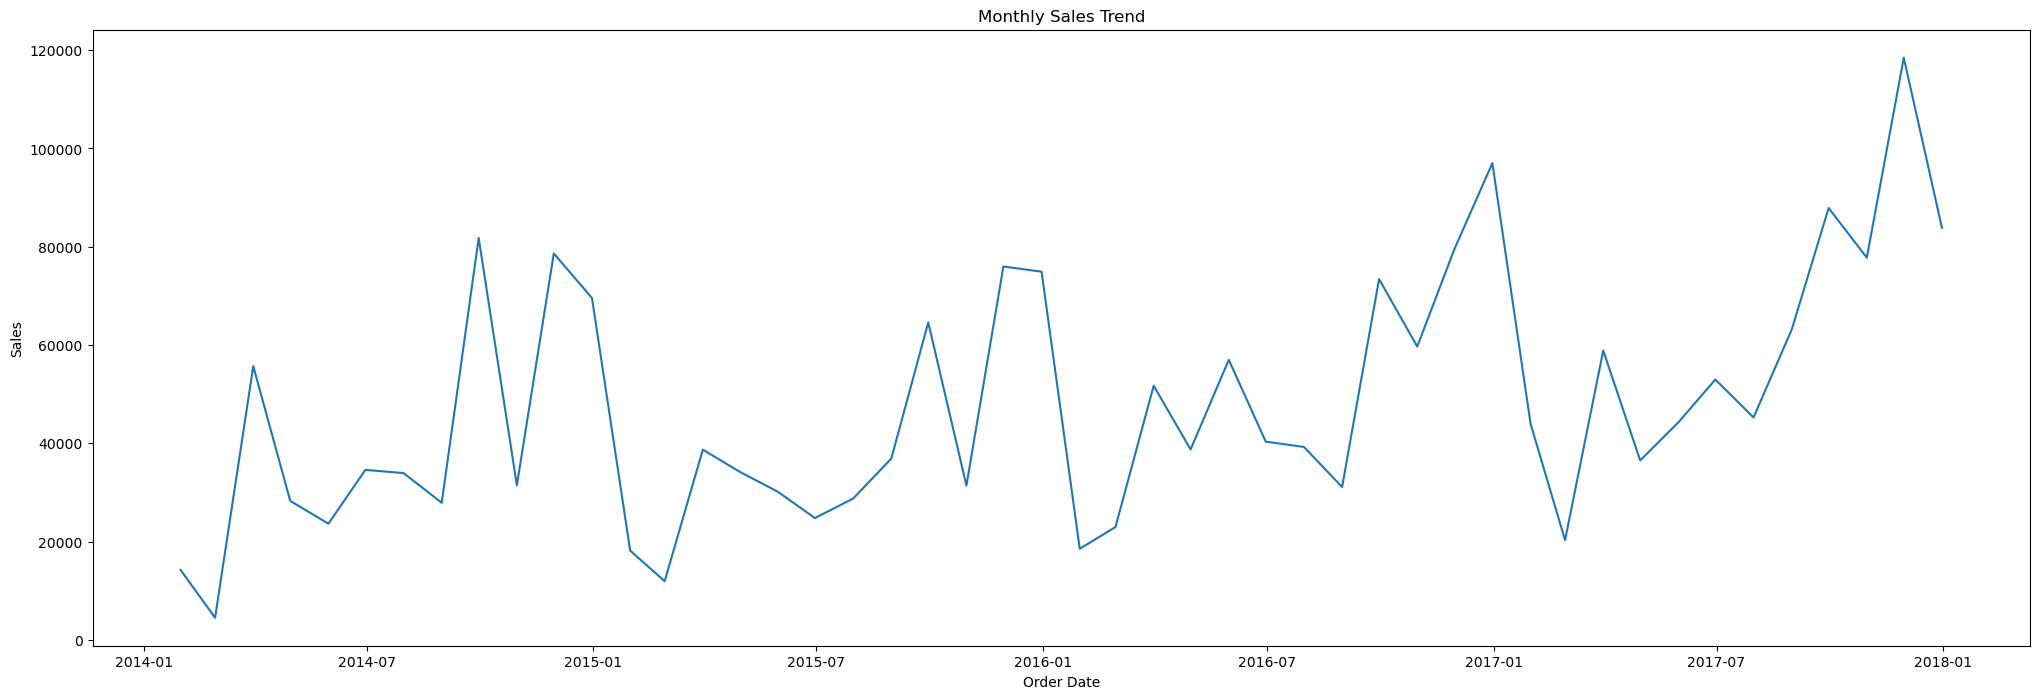

In [75]:
# resample working only when the date column is the index 
# Resample the data into monthly intervals
monthly_sales = df.set_index('Order Date').resample('M').Sales.sum()
plt.figure(figsize=(25,8))
plt.plot(monthly_sales)
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.title("Monthly Sales Trend")
plt.show()

In [67]:
# to explore why the profit is down in central rejion ( show the discount)
product = df[(df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") & (df["Region"] == "Central")]
product

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2846,2847,CA-2017-152093,2017-09-10,2017-09-15,Standard Class,SN-20560,Skye Norling,Home Office,United States,Chicago,Illinois,60653,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,762.594,3,0.8,-1143.891
5310,5311,CA-2017-131254,2017-11-19,2017-11-21,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,Texas,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,1525.188,6,0.8,-2287.782
7683,7684,CA-2015-120782,2015-04-28,2015-05-01,First Class,SD-20485,Shirley Daniels,Home Office,United States,Midland,Michigan,48640,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,3812.970,3,0.0,1906.485


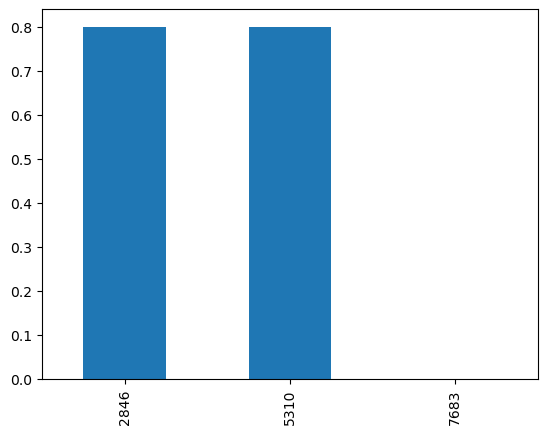

In [68]:
product = df[(df["Product Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind") & (df["Region"] == "Central")]

# Plot a histogram of the discounts offered for the product in the central region
product["Discount"].plot(kind="bar")

# Show the plot
plt.show()


The company loses when it sells its **Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind** products in the Central! as it make 80% discount on 2 products from 3 products

**The general trend of the company is profit, but there are some periods in which profits decrease and then rise again. I think it's because of the discounts**

# the best salles 

The best sales are when the discount is 50%, but this leads to loss and non-profitability.

The discount from 10 to 20%. Is the best solution, as they are the second and third best sellers and make profits

In [91]:
df[['Sales','Discount','Profit']].corr(numeric_only=True)

,Sales,Discount,Profit
Sales,1.000000,-0.028190,0.479064
Discount,-0.028190,1.000000,-0.219487
Profit,0.479064,-0.219487,1.000000


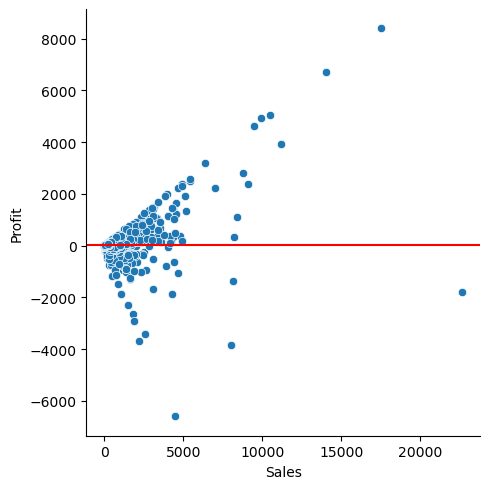

In [92]:
profit_median = df['Profit'].median()
sns.relplot(x='Sales', y= 'Profit', data=df)
plt.axhline(profit_median, color = 'r')

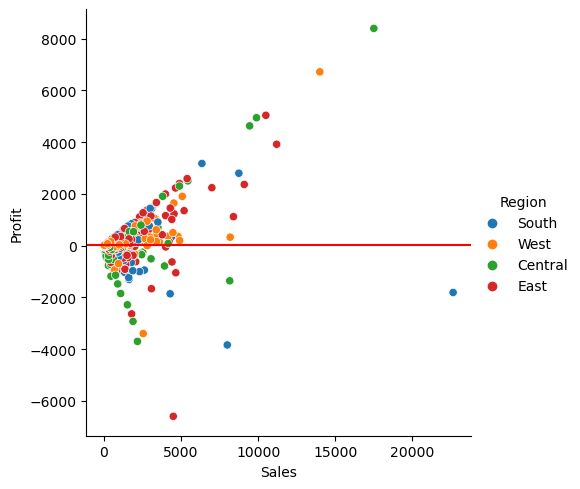

In [93]:
sns.relplot(x='Sales', y= 'Profit', data=df , hue= 'Region')
plt.axhline(profit_median, color = 'r')

In [94]:
df_new1 = df[df['Sales']>4000][df['Region'] == 'East'][df['Profit'] < 0]
df_new1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1803,1804,CA-2017-158379,2017-09-22,2017-09-26,Second Class,JA-15970,Joseph Airdo,Consumer,United States,Philadelphia,Pennsylvania,19134,East,OFF-SU-10002881,Office Supplies,Supplies,Martin Yale Chadless Opener Electric Letter Op...,4663.736,7,0.2,-1049.3406
6535,6536,CA-2014-128209,2014-11-17,2014-11-22,Standard Class,GT-14710,Greg Tran,Consumer,United States,Buffalo,New York,14215,East,FUR-BO-10002213,Furniture,Bookcases,DMI Eclipse Executive Suite Bookcases,4007.840,10,0.2,-50.0980
7243,7244,CA-2017-118892,2017-08-17,2017-08-22,Second Class,TP-21415,Tom Prescott,Consumer,United States,Philadelphia,Pennsylvania,19134,East,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,4416.174,9,0.3,-630.8820
7772,7773,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,43130,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.9780


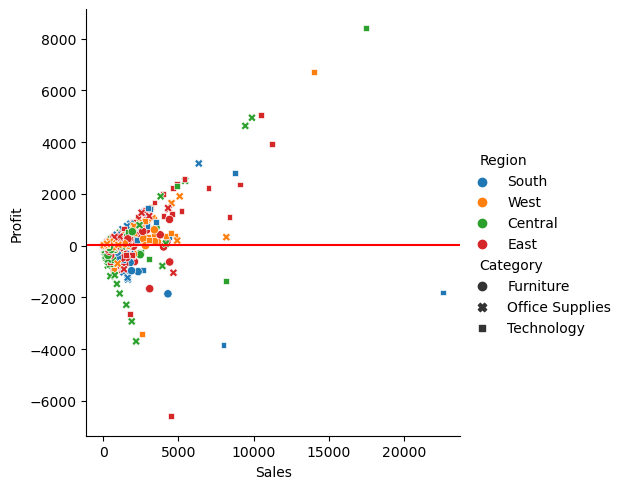

In [95]:
sns.relplot(x='Sales', y= 'Profit', data=df, hue= 'Region', style='Category' )
plt.axhline(profit_median, color = 'r')

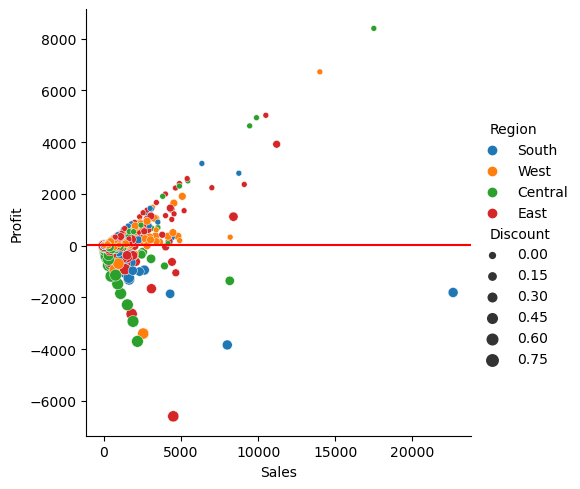

In [96]:
sns.relplot(x='Sales', y= 'Profit', data=df, hue= 'Region',  size='Discount')
plt.axhline(profit_median, color = 'r')
plt.show()

In [97]:
df[df['Profit']<0].groupby('Region').Profit.sum()

Region
Central   -56314.8850
East      -49590.6075
South     -27504.8323
West      -22720.9609
Name: Profit, dtype: float64

# Machine Learning

In [98]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Types of systems we can make on this dataset
- Sales forecasting

- Customer segmentation.

- Product recommendation.

- Anomaly detection.

